# Optimalisasi Persediaan Barang dan Prediksi Permintaan Berbasis Data Mining

Proyek ini menggunakan metode regresi linear untuk memprediksi permintaan barang berdasarkan data penjualan. Dataset yang digunakan berasal dari kompetisi [Kaggle Store Sales - Time Series Forecasting](https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data).

## Deskripsi Dataset

- **train.csv:** Data penjualan historis.
- **test.csv:** Data untuk prediksi.
- **stores.csv:** Informasi mengenai toko.
- **oil.csv:** Harga minyak harian.
- **holidays_events.csv:** Informasi mengenai hari libur dan acara.
- **transactions.csv:** Data transaksi harian.

## Langkah-langkah

1. Mengimpor Libraries yang Dibutuhkan
2. Membaca Dataset
3. Pra-Pemrosesan Data
4. Eksplorasi Data
5. Menggabungkan Data
6. Feature Engineering
7. Membangun Model Regresi Linear
8. Melakukan Prediksi dan Evaluasi Model
9. Menggunakan Model untuk Memprediksi Data Uji


In [10]:
# Step 1: Mengimpor Libraries yang Dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Step 2: Membaca Dataset

Membaca file dataset yang diperlukan menggunakan `pd.read_csv()`.


In [11]:
# Step 2: Membaca Dataset
train = pd.read_csv('/workspaces/codespaces-jupyter/data/train.csv')
test = pd.read_csv('/workspaces/codespaces-jupyter/data/test.csv')
stores = pd.read_csv('/workspaces/codespaces-jupyter/data/stores.csv')
oil = pd.read_csv('/workspaces/codespaces-jupyter/data/oil.csv')
holidays_events = pd.read_csv('/workspaces/codespaces-jupyter/data/holidays_events.csv')
transactions = pd.read_csv('/workspaces/codespaces-jupyter/data/transactions.csv')

## Step 3: Pra-Pemrosesan Data

Mengonversi kolom 'date' menjadi tipe datetime dan mengisi nilai yang hilang pada data oil dengan metode forward fill.

In [12]:
# Step 3: Pra-Pemrosesan Data
# Mengonversi kolom 'date' menjadi tipe datetime
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])
oil['date'] = pd.to_datetime(oil['date'])
holidays_events['date'] = pd.to_datetime(holidays_events['date'])
transactions['date'] = pd.to_datetime(transactions['date'])

# Mengisi missing values pada data oil dengan metode forward fill
oil['dcoilwtico'] = oil['dcoilwtico'].fillna(method='ffill')

/tmp/ipykernel_2031/2291059673.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  oil['dcoilwtico'] = oil['dcoilwtico'].fillna(method='ffill')


## Step 4: Eksplorasi Data

Melakukan visualisasi data penjualan untuk melihat tren penjualan dari waktu ke waktu.

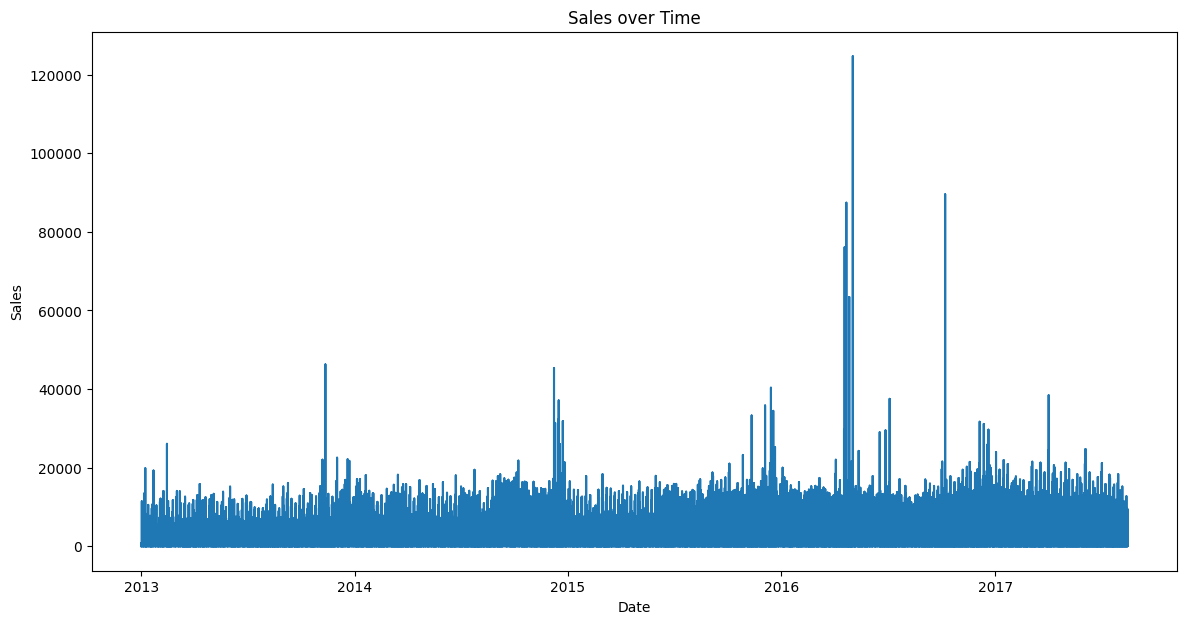

In [13]:
# Step 4: Eksplorasi Data
plt.figure(figsize=(14, 7))
plt.plot(train['date'], train['sales'])
plt.title('Sales over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

## Step 5: Menggabungkan Data

Menggabungkan dataset tambahan seperti oil, transactions, dan stores ke dalam dataset utama.

In [14]:
# Step 5: Menggabungkan Data
train = train.merge(oil, on='date', how='left')
train = train.merge(transactions, on=['date', 'store_nbr'], how='left')
train = train.merge(stores, on='store_nbr', how='left')

# Mengisi missing values
train['transactions'] = train['transactions'].fillna(0)
train['dcoilwtico'] = train['dcoilwtico'].fillna(train['dcoilwtico'].mean())

## Step 6: Feature Engineering

Menambahkan fitur-fitur baru yang berguna seperti hari, bulan, tahun, dan hari dalam minggu dari kolom 'date'.

In [15]:
# Step 6: Feature Engineering
train['day'] = train['date'].dt.day
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year
train['dayofweek'] = train['date'].dt.dayofweek

## Step 7: Membangun Model Regresi Linear

Membuat dan melatih model regresi linear menggunakan fitur yang telah dipilih.

In [16]:
# Step 7: Membangun Model Regresi Linear
# Menggunakan fitur yang dipilih untuk prediksi
features = ['store_nbr', 'onpromotion', 'dcoilwtico', 'transactions', 'day', 'month', 'year', 'dayofweek']
X = train[features]
y = train['sales']

# Memeriksa dan mengisi missing values pada fitur
X = X.fillna(X.mean())

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Step 8: Melakukan Prediksi dan Evaluasi Model

Melakukan prediksi menggunakan model yang telah dilatih dan mengevaluasi kinerjanya dengan metrik seperti Mean Squared Error dan R-squared. Hasil prediksi juga divisualisasikan untuk perbandingan dengan data aktual.

Mean Squared Error: 958504.407972793
R-squared: 0.22876144817506783


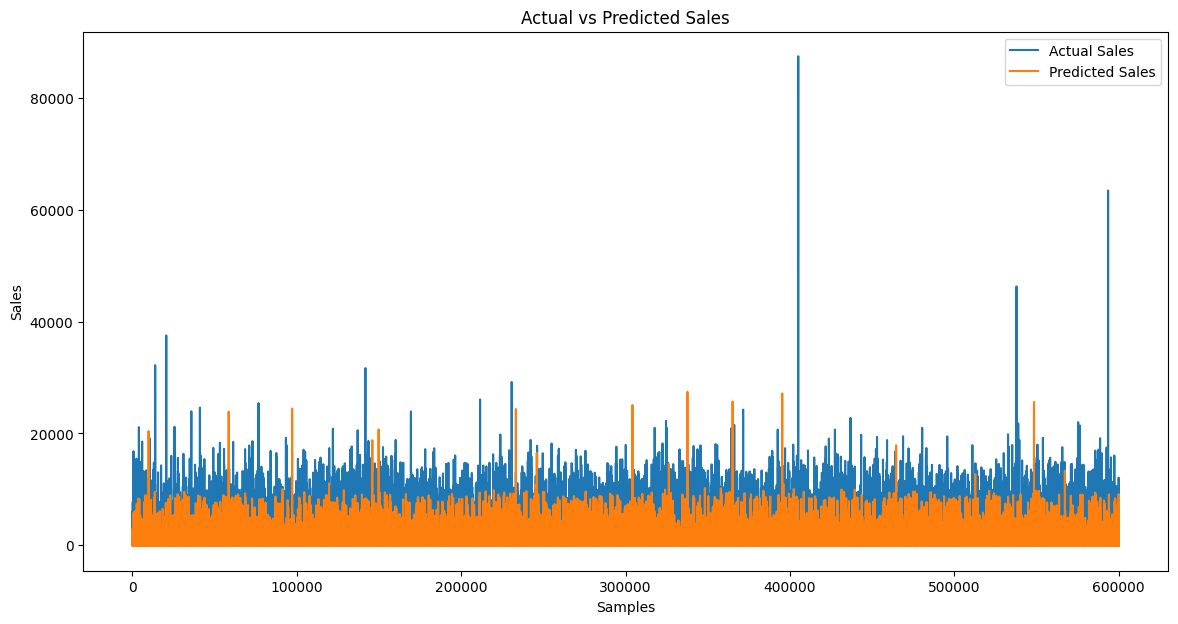

In [17]:
# Step 8: Melakukan Prediksi dan Evaluasi Model
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualisasi hasil prediksi vs data aktual
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Sales')
plt.plot(y_pred, label='Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Samples')
plt.ylabel('Sales')
plt.legend()
plt.show()

## Step 9: Menggunakan Model untuk Memprediksi Data Uji

Melakukan pra-pemrosesan yang sama pada data uji dan menggunakan model untuk memprediksi nilai sales pada data uji. Hasil prediksi disimpan dalam format yang sesuai untuk submission.

In [18]:
# Step 9: Menggunakan Model untuk Memprediksi Data Uji
# Melakukan pra-pemrosesan yang sama pada data uji
test = test.merge(oil, on='date', how='left')
test = test.merge(transactions, on=['date', 'store_nbr'], how='left')
test = test.merge(stores, on='store_nbr', how='left')

# Mengisi missing values
test['transactions'] = test['transactions'].fillna(0)
test['dcoilwtico'] = test['dcoilwtico'].fillna(test['dcoilwtico'].mean())

# Menambahkan fitur baru pada data uji
test['day'] = test['date'].dt.day
test['month'] = test['date'].dt.month
test['year'] = test['date'].dt.year
test['dayofweek'] = test['date'].dt.dayofweek

# Menggunakan model untuk memprediksi data uji
X_test = test[features]
X_test = X_test.fillna(X_test.mean())
test['sales'] = model.predict(X_test)

# Menyimpan hasil prediksi dalam format yang sesuai untuk submission
submission = test[['id', 'sales']]
submission.to_csv('submission.csv', index=False)